<a href="https://colab.research.google.com/github/bosiqbal/deteksihistogram/blob/main/Deteksi_bentuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving shapes-circle-triangle-square-contours-geometric-shapes-illustration-shapes-circle-triangle-square-contours-235527221.webp to shapes-circle-triangle-square-contours-geometric-shapes-illustration-shapes-circle-triangle-square-contours-235527221.webp


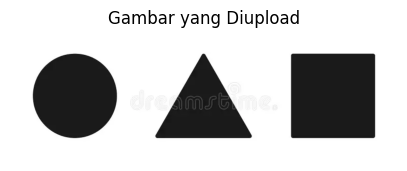

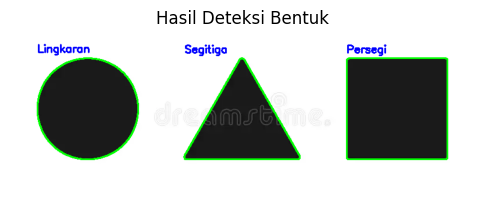

Hasil Deteksi Bentuk:
Bentuk 1: Persegi
Bentuk 2: Segitiga
Bentuk 3: Lingkaran


In [ ]:
# Install OpenCV jika belum terpasang
!pip install opencv-python-headless

# Import library
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Langkah 1: Upload Gambar ===
uploaded = files.upload()
filename = next(iter(uploaded))

# === Langkah 2: Baca dan Tampilkan Gambar ===
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Gambar yang Diupload")
plt.axis("off")
plt.show()

# === Langkah 3: Deteksi dan Klasifikasi Bentuk ===
def detect_shapes_and_names(img):
    output = img.copy()
    results = []

    # Preprocessing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)

    # Temukan kontur
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)
        x, y, w, h = cv2.boundingRect(approx)

        # Klasifikasi bentuk
        shape = "Tidak Diketahui"
        if len(approx) == 3:
            shape = "Segitiga"
        elif len(approx) == 4:
            ratio = w / float(h)
            if 0.95 < ratio < 1.05:
                shape = "Persegi"
            else:
                shape = "Trapesium / Persegi Panjang"
        elif len(approx) > 4:
            shape = "Lingkaran"

        # Gambar dan label
        cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)
        cv2.putText(output, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        results.append(shape)

    # Tampilkan hasil deteksi pada gambar
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Hasil Deteksi Bentuk")
    plt.axis("off")
    plt.show()

    # Tampilkan hasil bentuk dalam teks
    print("Hasil Deteksi Bentuk:")
    for i, shape in enumerate(results, 1):
        print(f"Bentuk {i}: {shape}")

# Jalankan deteksi
detect_shapes_and_names(cv2.imread(filename))

# Bagian Baru